In [1]:
%load_ext autoreload
%autoreload 2

### Fruit Bat vocalizations
Source:
- local: /mnt/cube/Datasets/FruitBat
- https://www.nature.com/articles/sdata2017143
- /mnt/cube/tsainbur/Projects/github_repos/generativevocalizationnetwork/notebooks/bat_vocalizations/
- https://figshare.com/collections/An_annotated_dataset_of_Egyptian_fruit_bat_vocalizations_across_varying_contexts_and_during_vocal_ontogeny/3666502

Metadata: https://figshare.com/articles/Egyptian_fruit_bat_vocalizations_metadata_Metadata_pdf_/4555900

Example spectrograms: https://figshare.com/articles/Egyptian_fruit_bat_vocalizations_-_Example_spectrograms/5016002

### annotations

<img src="behaviors.png">

In [2]:
contexts = {
    0: "Unknown",
    1: "Separation",
    2: "Biting",
    3: "Feeding",
    4: "Fighting",
    5: "Grooming",
    6: "Isolation",
    7: "Kissing",
    8: "Landing",
    9: "Mating protest",
    10: "Threat-like",
    11: "General",
    12: "Sleeping",
}

### Import packages

In [3]:
import pandas as pd
from pathlib2 import Path
import numpy as np
from avgn_paper.utils.audio import load_wav
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display

In [4]:
DSLOC = Path('/mnt/cube/Datasets/FruitBat/').resolve()

### Annotations file holds information about
- FileID: File Identifier with properties detailed in FileInfo.csv (Data Citation 1)
- Emitter: Bat ID of the emitter of the vocalizations.Negative value: the specified ID is of either the emitter or the addressee
- Addressee: Bat ID of the addresseeof the vocalizations.Negative value: the specified ID is of either the emitter or the addressee
- Context: he context of the vocalizations as specified in Table 4.
- Pre/Post vocalization actions for emmitter/addressee: The action performed by the emitter of the vocalization before the start of the vocal interaction.
- when the sample starts and ends (in terms of the wav/fileid)

In [5]:
annotations =  pd.read_csv(DSLOC/'Annotations.csv')

In [6]:
len(annotations)

91080

In [7]:
annotations[:3]

FileID  Emitter  Addressee  Context  Emitter pre-vocalization action  \
0       7      118          0        9                                2   
1      11        0          0       11                                0   
2      12      118          0       12                                2   

   Addressee pre-vocalization action  Emitter post-vocalization action  \
0                                  2                                 3   
1                                  0                                 0   
2                                  2                                 3   

   Addressee post-vocalization action  Start sample  End sample  
0                                   3             1      336720  
1                                   0             1      787280  
2                                   3             1      566096

In [8]:
len(np.unique(annotations.Emitter.values))

83

### FileInfo holds information about:
- FileID:
- Treatment ID: 
- File name: 
- File folder:
- Recording Channel
- Recording time
- Voicing start/stop info

In [9]:
file_info = pd.read_csv('/mnt/cube/Datasets/FruitBat/FileInfo.csv', names = np.arange(50))
file_info.columns = file_info.loc[0].values
file_info = file_info[1:]

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (0,1,4,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
len(file_info)

293238

In [11]:
file_info[:3]

FileID Treatment ID               File name File folder Recording channel  \
1      1            1  120601000005102988.WAV    files101                11   
2      2            1  120601000005108269.WAV    files101                 4   
3      3            1  120601000011795989.WAV    files101                11   

        Recording time Voice start sample (1) Voice end sample (1)  \
1  2012-06-01 00:01:57                  52100               120902   
2  2012-06-01 00:01:57                  28895                89442   
3  2012-06-01 00:02:04                  54143               100989   

  Voice start sample (2) Voice end sample (2)  ...  NaN  NaN  NaN  NaN  NaN  \
1                 130577               158906  ...  NaN  NaN  NaN  NaN  NaN   
2                 102612               129387  ...  NaN  NaN  NaN  NaN  NaN   
3                 101607               121337  ...  NaN  NaN  NaN  NaN  NaN   

   NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  

[3 rows x 50 columns]

In [12]:
file_info[file_info['File name'].values == '130601055026343840.WAV']

FileID Treatment ID               File name File folder  \
270935  270935           19  130601055026343840.WAV    files222   

       Recording channel       Recording time Voice start sample (1)  \
270935                 1  2013-06-01 06:45:15                  46892   

       Voice end sample (1) Voice start sample (2) Voice end sample (2)  ...  \
270935                59237                 148176               160394  ...   

        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
270935  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[1 rows x 50 columns]

### Take some samples from one part

In [17]:
# subset the files that are annotated
files106_info = file_info[file_info['File folder'].values == 'files106']
annotated_Files106 = files106_info[[i in annotations.FileID for i in files106_info.FileID.values]]
print(len(annotated_Files106))
annotated_Files106[:3]

3436


FileID Treatment ID               File name File folder  \
50001  50001            2  120904055201489979.WAV    files106   
50002  50002            2  120904055611482980.WAV    files106   
50003  50003            2  120904055612233164.WAV    files106   

      Recording channel       Recording time Voice start sample (1)  \
50001                12  2012-09-04 06:17:36                  52966   
50002                12  2012-09-04 06:21:46                  87307   
50003                 9  2012-09-04 06:21:47                  45295   

      Voice end sample (1) Voice start sample (2) Voice end sample (2)  ...  \
50001                71110                    NaN                  NaN  ...   
50002               104895                 279081               301899  ...   
50003                67728                    NaN                  NaN  ...   

       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50001  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50002  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50003  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 50 columns]

In [18]:
files106 = list((DSLOC/'files106').glob('*.WAV'))

#### Subset a wav

In [19]:
exnm = 2
wav_loc = DSLOC/'files106'/ annotated_Files106['File name'].values[exnm]
wav_loc

PosixPath('/mnt/cube/Datasets/FruitBat/files106/120904055612233164.WAV')

In [20]:
rate, data = load_wav(wav_loc)
print(rate, len(data))

250000 320336


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [21]:
wav_info = file_info[file_info['File name'] == wav_loc.name]

In [22]:
sample_start = wav_info['Voice start sample (1)'].values[0]
sample_end = wav_info['Voice end sample (1)'].values[0]
print(sample_start, sample_end)

45295 67728


In [23]:
# get start and end times from this file
start_times = wav_info.values[:,6:][pd.isnull(wav_info.values[:,6:]) == False][::2]
# get start and end times from this file
end_times = wav_info.values[:,6:][pd.isnull(wav_info.values[:,6:]) == False][1:][::2]
print(start_times, end_times)

[45295] [67728]


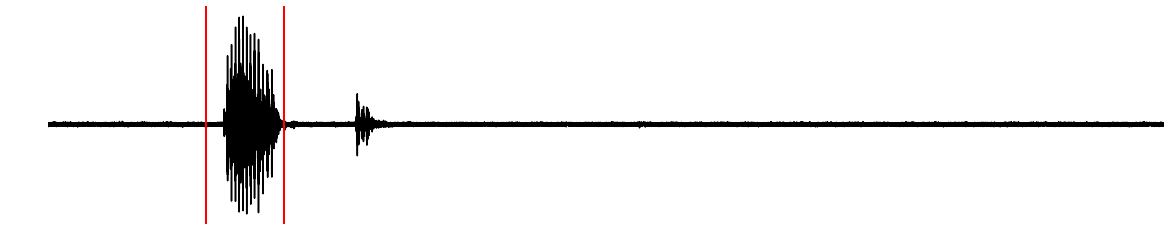

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
plt.plot(data, color='black')
ax.set_xlim((0, len(data)))
ax.axis('off')
for st, et in zip(start_times, end_times):
    ax.axvline(x=st, color = 'red', lw=2)
    ax.axvline(x=et, color='red', lw=2)
plt.show()

In [25]:
sample_start = int(start_times[0])
sample_end = int(end_times[0])

In [46]:
len(data[sample_start:sample_end])/rate

0.089732

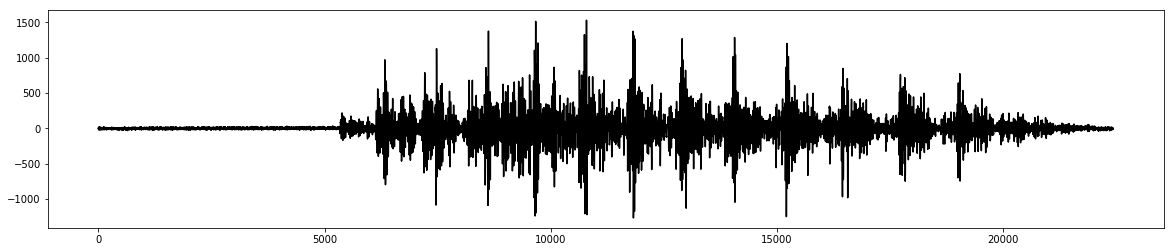

In [91]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
plt.plot(data[sample_start:sample_end], color='black')
#ax.axis('off')
plt.show()

In [92]:
# play back a sample of the song
IPython.display.Audio(data=data[sample_start:sample_end], rate=int(rate*.1))

### Create a spectrogram of the data

In [105]:
param_dict = {}

# parameters for
spectrogramming_params = {
    # spectrograms
    "mel_filter": False,  # should a mel filter be used?
    "num_freq": 2048,  # how many channels to use in a spectrogram
    "preemphasis": 0.97,
    "min_silence_for_spec": 0.5,  # minimum length of silence for a spectrogram to be considered a good spectrogram
    "max_vocal_for_spec": 5.0,  # the longest a single vocalization (protosyllable) is allowed to be
    "frame_shift_ms": .1,  # step size for fft
    "frame_length_ms": .5,  # frame length for fft
    "min_level_dB": -80,  # minimum threshold db for computing spe
    "min_level_dB_floor": -20,  # (db)
    "spec_thresh_delta_dB": 5,  # (db) what
    "ref_level_dB": 20,  # reference db for computing spec
    "sample_rate": rate,  # sample rate of your data
}

signal_filter_params = {
    "lowcut": 50,  # Hz # Low cut for our butter bandpass filter
    "highcut": int(rate/2),  # Hz # High cut for our butter bandpass filter
    "rms_window": 0.01,  # seconds # the size of your window
    "rms_stride": 0.01,  # seconds # how big your step size should be for moving the filter
    "noise_thresh": 0.01,  # threshold percent of maximum noise to consider silence
    "segment_padding": 4.0,  # seconds to pad waveform extracted
    "rms_padding": 1.0,  # seconds # how much to pad around vocalizations
}

param_dict["fruitbat"] = {}

for d in [spectrogramming_params, signal_filter_params]:
    for k, v in d.items():
        param_dict["fruitbat"][k] = v

In [106]:
20 * (250000/1000)

5000.0

In [107]:
250000/1000

250.0

In [108]:
from avgn_paper.signalprocessing.spectrogramming import spectrogram
from avgn.utils.audio import load_wav, float32_to_int16, int16_to_float32, write_wav
from avgn.visualization.spectrogram import visualize_spec, plot_spec

In [109]:
wav_spectrogram = spectrogram(int16_to_float32(data[sample_start:sample_end]), param_dict["fruitbat"])

25 125


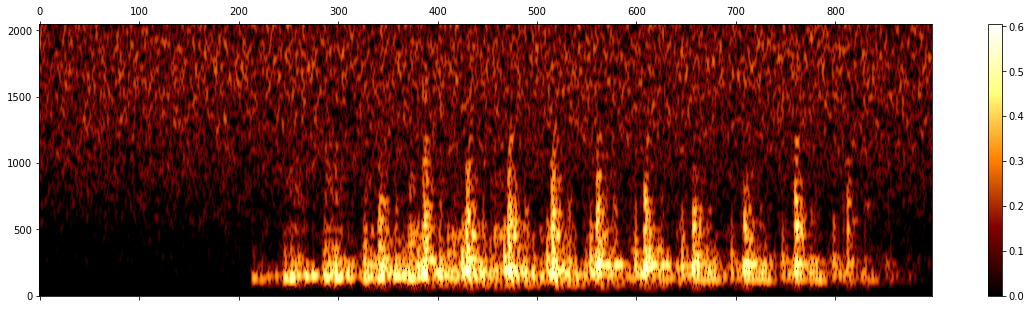

In [110]:
visualize_spec(wav_spectrogram, show=True)

### Make a list of wavs currently available on the disk

In [45]:
wavs_on_disk = list(DSLOC.expanduser().glob('files*/'))
wavs_on_disk = [i for i in wavs_on_disk if i.is_dir() == True]
wavs_on_disk

[PosixPath('/mnt/cube/Datasets/FruitBat/files221'),
 PosixPath('/mnt/cube/Datasets/FruitBat/files222'),
 PosixPath('/mnt/cube/Datasets/FruitBat/files218'),
 PosixPath('/mnt/cube/Datasets/FruitBat/files220'),
 PosixPath('/mnt/cube/Datasets/FruitBat/files223'),
 PosixPath('/mnt/cube/Datasets/FruitBat/files106'),
 PosixPath('/mnt/cube/Datasets/FruitBat/files224')]

In [33]:
file_info_on_disk = file_info[file_info['File folder'].isin([_dir.name for _dir in wavs_on_disk])]

In [34]:
file_info_on_disk[:3]

FileID Treatment ID               File name File folder  \
50001  50001            2  120904055201489979.WAV    files106   
50002  50002            2  120904055611482980.WAV    files106   
50003  50003            2  120904055612233164.WAV    files106   

      Recording channel       Recording time Voice start sample (1)  \
50001                12  2012-09-04 06:17:36                  52966   
50002                12  2012-09-04 06:21:46                  87307   
50003                 9  2012-09-04 06:21:47                  45295   

      Voice end sample (1) Voice start sample (2) Voice end sample (2)  ...  \
50001                71110                    NaN                  NaN  ...   
50002               104895                 279081               301899  ...   
50003                67728                    NaN                  NaN  ...   

       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50001  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50002  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50003  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 50 columns]

In [35]:
len(file_info_on_disk)

63238

### Make a list of currently available annotated vocalizations

In [36]:
annotations_on_disk = annotations[annotations['FileID'].isin(list(np.unique(file_info_on_disk.FileID.values)))]

In [37]:
annotations_on_disk[:3]

FileID  Emitter  Addressee  Context  Emitter pre-vocalization action  \
11675   50001     -109          0       12                                2   
11676   50002     -119          0        4                                2   
11677   50005     -119          0        4                                2   

       Addressee pre-vocalization action  Emitter post-vocalization action  \
11675                                  2                                 3   
11676                                  2                                 3   
11677                                  2                                 3   

       Addressee post-vocalization action  Start sample  End sample  
11675                                   3             1      328528  
11676                                   3             1      582480  
11677                                   3        179671      475984

In [38]:
len(annotations_on_disk)

22870

### Make a list of most common emitters

In [39]:
emitter_freq = pd.DataFrame({emm: [np.sum(annotations_on_disk.Emitter == emm)] for emm in np.unique(annotations_on_disk.Emitter)}).T
emitter_freq.columns = ['N_voc']
emitter_freq = emitter_freq.sort_values(by='N_voc', ascending=False)
emitter_freq[:5]

N_voc
 215   2672
-215   2024
 230   1971
-231   1339
-230   1286

In [83]:
context_freq = pd.DataFrame({context: [np.sum(annotations_on_disk.Context == context)] for context in np.unique(annotations_on_disk.Context)}).T
context_freq.columns = ['N_voc']
context_freq = context_freq.sort_values(by='N_voc', ascending=False)
context_freq['context']= [contexts[idx] for idx, row in context_freq.iterrows()]
context_freq[:5]
context_freq[:5]

N_voc         context
12  12164        Sleeping
11   5076         General
3    2043         Feeding
4    1090        Fighting
9     931  Mating protest

### Create spectrograms of multiple vocalizations, based on emitter & Context

In [41]:
indv = 215

In [42]:
indv_annotations = annotations_on_disk[annotations_on_disk.Emitter == indv]

In [43]:
indv_annotations[:3]

FileID  Emitter  Addressee  Context  Emitter pre-vocalization action  \
64780  223437      215        207        9                                2   
64787  223452      215        207       12                                2   
64818  223509      215        220       12                                2   

       Addressee pre-vocalization action  Emitter post-vocalization action  \
64780                                  2                                 3   
64787                                  2                                 3   
64818                                  2                                 3   

       Addressee post-vocalization action  Start sample  End sample  
64780                                   3             1      328528  
64787                                   3        583190      852816  
64818                                   3             1      328528

In [44]:
len(indv_annotations)

2672

In [45]:
indv_context_freq = pd.DataFrame({context: [np.sum(indv_annotations.Context == context)] for context in np.unique(indv_annotations.Context)}).T
indv_context_freq.columns = ['N_voc']
indv_context_freq = indv_context_freq.sort_values(by='N_voc', ascending=False)
indv_context_freq['context']= [contexts[idx] for idx, row in indv_context_freq.iterrows()]
indv_context_freq[:5]

N_voc         context
12   1584        Sleeping
9     456  Mating protest
11    328         General
2     147          Biting
3      60         Feeding

In [46]:
for idx, row in indv_annotations.iterrows():
    break

In [47]:
row

FileID                                223437
Emitter                                  215
Addressee                                207
Context                                    9
Emitter pre-vocalization action            2
Addressee pre-vocalization action          2
Emitter post-vocalization action           3
Addressee post-vocalization action         3
Start sample                               1
End sample                            328528
Name: 64780, dtype: int64

In [48]:
voc_info = file_info_on_disk[file_info_on_disk.FileID == row.FileID]
voc_info

FileID Treatment ID               File name File folder  \
223437  223437           17  130328065533302345.WAV    files218   

       Recording channel       Recording time Voice start sample (1)  \
223437                 1  2013-03-28 07:02:11                  53048   

       Voice end sample (1) Voice start sample (2) Voice end sample (2)  ...  \
223437                65281                  88192                99625  ...   

        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
223437  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[1 rows x 50 columns]

In [49]:
wav_path = DSLOC / voc_info['File folder'].values[0] / voc_info['File name'].values[0]
wav_path

PosixPath('/mnt/cube/Datasets/FruitBat/files218/130328065533302345.WAV')

In [50]:
# get start and end times from this file
start_times = voc_info.values[:,6:][pd.isnull(voc_info.values[:,6:]) == False][::2]
# get start and end times from this file
end_times = voc_info.values[:,6:][pd.isnull(voc_info.values[:,6:]) == False][1:][::2]
print(start_times, end_times)

[53048 88192.0 120983.0] [65281 99625.0 147076.0]


In [51]:
rate, data = load_wav(wav_path)
print(rate, len(data))

250000 328528


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [52]:
wav_spectrogram = spectrogram(int16_to_float32(data[start_times[0]:end_times[0]]), param_dict["fruitbat"])

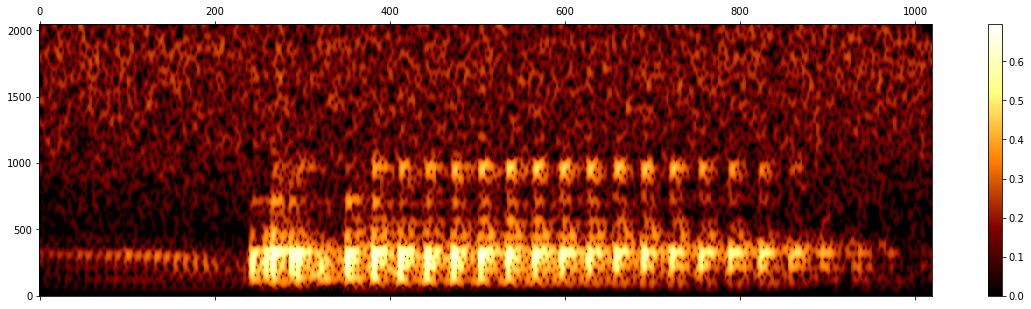

In [53]:
visualize_spec(wav_spectrogram, show=True)

In [67]:
??visualize_spec

In [54]:
# for the top  n_contexts, 

In [79]:
n_contexts = 4
nrow = 3
ncol = 5
zoom_x = 5
zoom_y = 3

In [82]:
rate

250000

In [80]:
param_dict = {}

# parameters for
spectrogramming_params = {
    # spectrograms
    "mel_filter": False,  # should a mel filter be used?
    "num_freq": 2048,  # how many channels to use in a spectrogram
    "preemphasis": 0.97,
    "min_silence_for_spec": 0.5,  # minimum length of silence for a spectrogram to be considered a good spectrogram
    "max_vocal_for_spec": 5.0,  # the longest a single vocalization (protosyllable) is allowed to be
    "frame_shift_ms": 0.05,  # step size for fft
    "frame_length_ms": .5,  # frame length for fft
    "min_level_dB": -70,  # minimum threshold db for computing spe
    "min_level_dB_floor": -20,  # (db)
    "spec_thresh_delta_dB": 5,  # (db) what
    "ref_level_dB": 20,  # reference db for computing spec
    "sample_rate": rate,  # sample rate of your data
}

signal_filter_params = {
    "lowcut": 50,  # Hz # Low cut for our butter bandpass filter
    "highcut": int(rate/2),  # Hz # High cut for our butter bandpass filter
    "rms_window": 0.01,  # seconds # the size of your window
    "rms_stride": 0.01,  # seconds # how big your step size should be for moving the filter
    "noise_thresh": 0.01,  # threshold percent of maximum noise to consider silence
    "segment_padding": 4.0,  # seconds to pad waveform extracted
    "rms_padding": 1.0,  # seconds # how much to pad around vocalizations
}

param_dict["fruitbat"] = {}

for d in [spectrogramming_params, signal_filter_params]:
    for k, v in d.items():
        param_dict["fruitbat"][k] = v

Sleeping


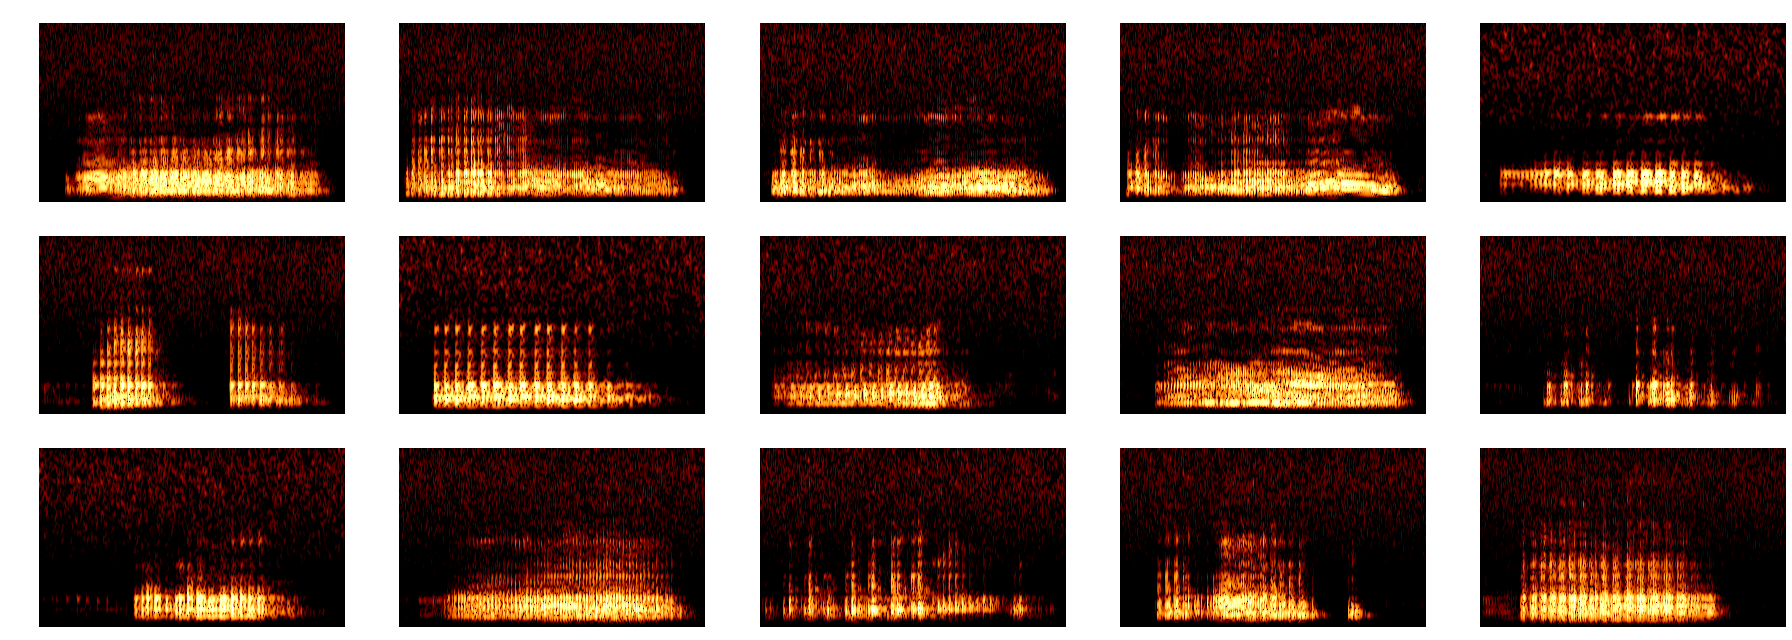


Mating protest


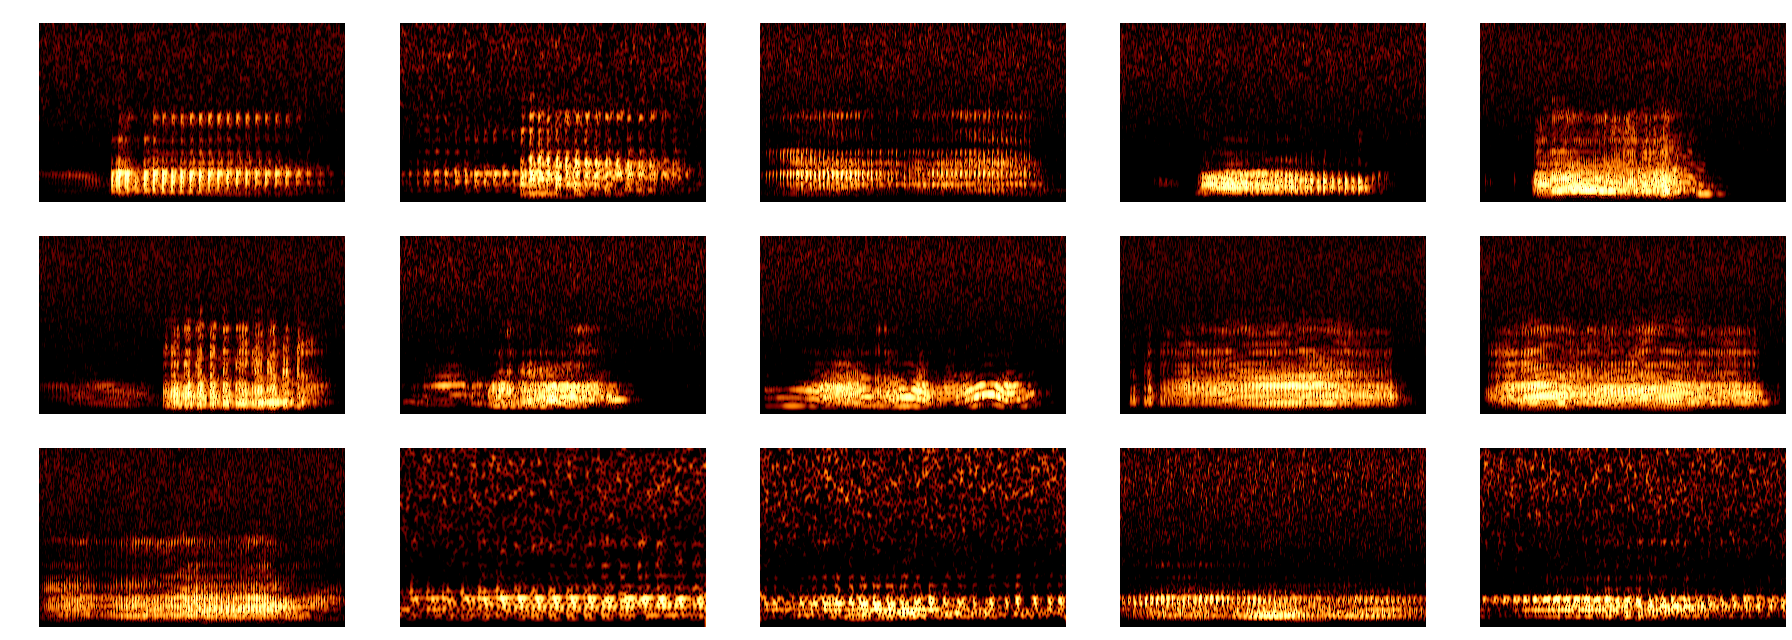


General


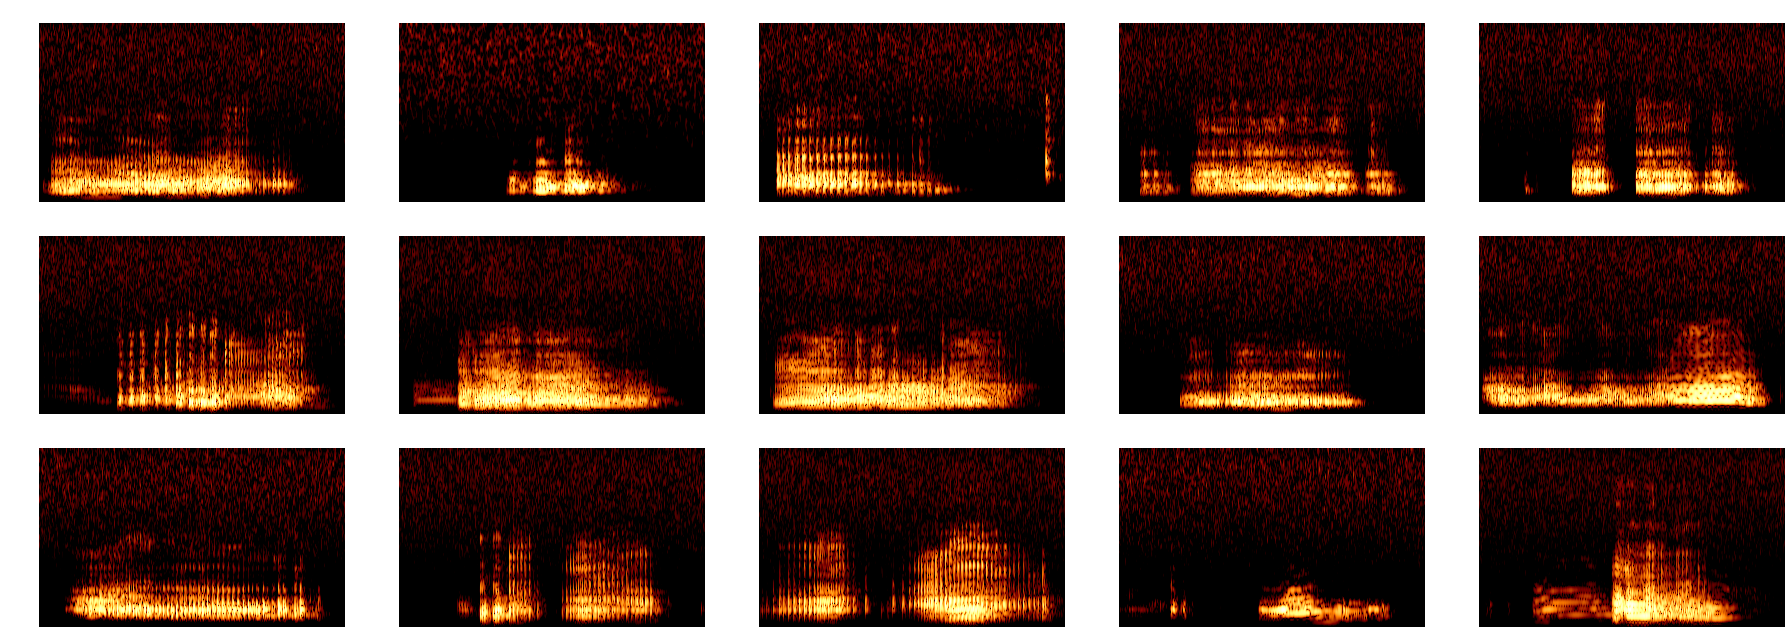


Biting


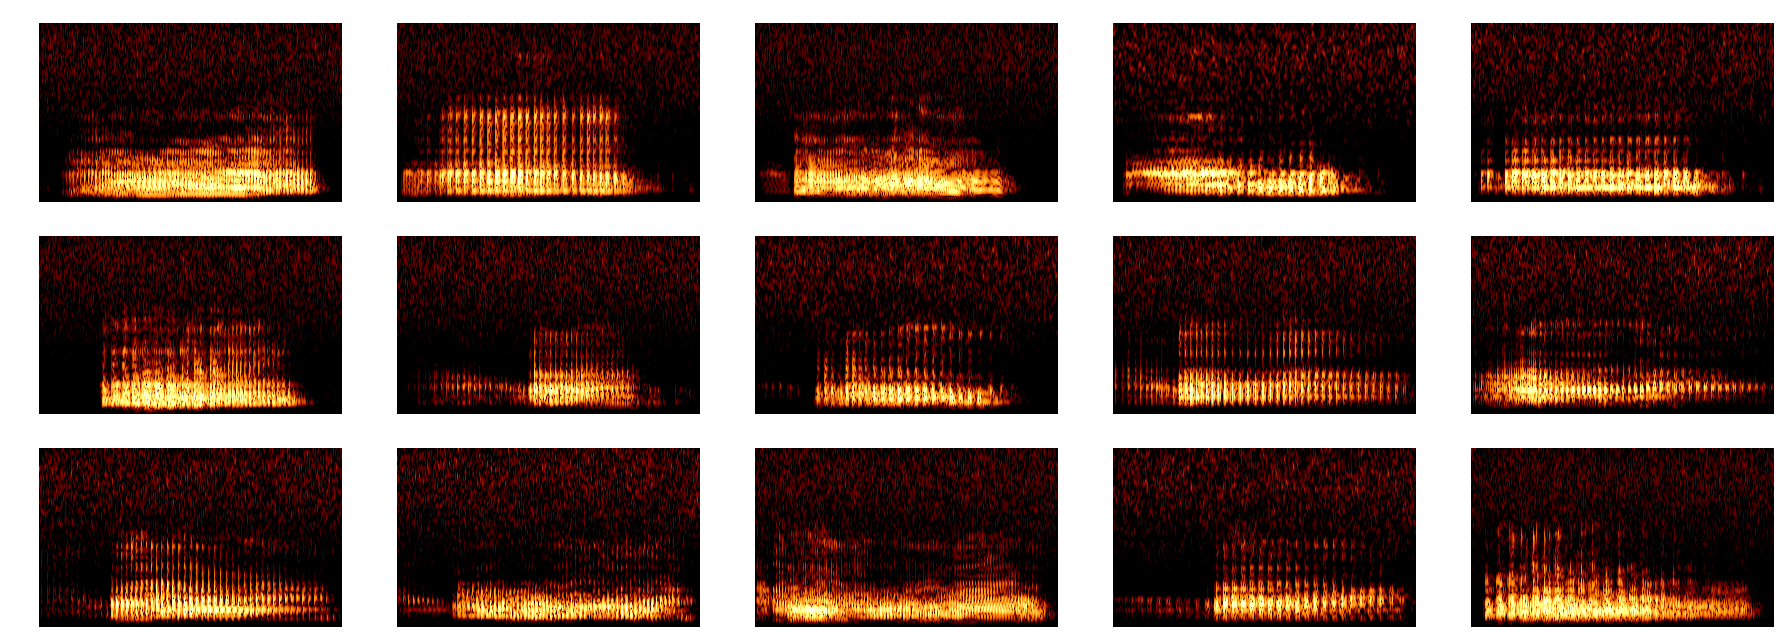

In [81]:
for ctxt, row in indv_context_freq[:n_contexts].iterrows():
    ctxt_annotations = indv_annotations[indv_annotations.Context == ctxt]
    print(row.context)
    # prepare the figure
    with tqdm(total=ncol*nrow) as pbar:
        pbar.set_description("examples")
        nex = 0
        fig, axs = plt.subplots(nrows = nrow, ncols=ncol, figsize=(ncol*zoom_x, nrow*zoom_y))
        for idx, row in ctxt_annotations.iterrows():    
            # get wav location of data
            voc_info = file_info_on_disk[file_info_on_disk.FileID == row.FileID]
            wav_path = DSLOC / voc_info['File folder'].values[0] / voc_info['File name'].values[0]
            # get start and end times from this file
            start_times = voc_info.values[:,6:][pd.isnull(voc_info.values[:,6:]) == False][::2]
            # get start and end times from this file
            end_times = voc_info.values[:,6:][pd.isnull(voc_info.values[:,6:]) == False][1:][::2]
            # load the data
            rate, data = load_wav(wav_path)
            for st, et in zip(start_times, end_times):
                wav_spectrogram = spectrogram(int16_to_float32(data[int(st):int(et)]), param_dict["fruitbat"])
                #axs.flatten()[nex].matshow(wav_spectrogram, origin='lower')
                plot_spec(wav_spectrogram, fig=fig, ax=axs.flatten()[nex], show_cbar=False)
                nex+=1
                pbar.update(1)
                if nex == nrow*ncol:
                    break
            if nex == nrow*ncol:
                    break
        for ax in axs.flatten():
            ax.axis('off')
        fig.tight_layout()
        plt.show()

#### find the most annotated folder

In [13]:
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [14]:
folder_annotations = {}
for folder in tqdm(np.unique(file_info["File folder"].values)):
    fids = file_info[file_info['File folder'] == folder].FileID.values
    #print(folder, len(fids))
    folder_annotations[folder] = np.sum([fid in annotations.FileID.values for fid in fids])

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [15]:
folder_annotations

{'files101': 0,
 'files102': 775,
 'files103': 2150,
 'files104': 3002,
 'files105': 2615,
 'files106': 824,
 'files201': 2837,
 'files202': 3621,
 'files203': 2108,
 'files204': 2976,
 'files205': 2262,
 'files206': 2307,
 'files207': 1540,
 'files208': 2940,
 'files209': 2540,
 'files210': 2181,
 'files211': 3516,
 'files212': 3596,
 'files213': 3236,
 'files214': 3435,
 'files215': 3971,
 'files216': 3852,
 'files217': 3161,
 'files218': 5007,
 'files219': 4191,
 'files220': 5299,
 'files221': 3406,
 'files222': 5152,
 'files223': 1152,
 'files224': 1328}

In [16]:
len(np.unique(annotations.FileID.values)), np.sum([num for folder, num in folder_annotations.items()])

(87986, 84980)